In [1]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
%matplotlib inline

In [173]:
class Game_state():
    
    def __init__(self, player):
        self.player = player
        self.turns = 1
        self.score = 0
        self.data = {}
    
    def game_loop(self):
        while self.turns <= 7:
            self.score += self.player.push()
            self.data[self.turns] = self.score
            self.turns += 1
        return self.data[7]
    

In [172]:
class Player():
    
    def __init__(self):
        pass
    
    def roll(self):
        roll = random.randint(1,6)
        if roll == 1:
            return 0
        else:
            return roll
    
    def push(self):
        roll_list = []
        while len(roll_list) < 1:
            roll_list.append(self.roll())
        return sum(roll_list)
    
    

            
        

In [169]:
class Push2player(Player):
    
    def __init__(self):
        super().__init__()
    
    def push(self):
        roll_list = []
        for _ in range(2):
            roll_list.append(self.roll())
        if 0 in roll_list:
            return 0
        else:
            return sum(roll_list)
            
class Push3player(Player):
    
    def __init__(self):
        super().__init__()
    
    def push(self):
        roll_list = []
        for _ in range(3):
            roll_list.append(self.roll())
        if 0 in roll_list:
            return 0
        else:
            return sum(roll_list)

In [309]:
class Pushxplayer(Player):
    
    def __init__(self,x):
        super().__init__()
        self.x = x
    def push(self):
        roll_list = []
        while sum(roll_list) < self.x:
            roll_list.append(self.roll())
        if 0 in roll_list:
            return 0
        else:
            return sum(roll_list)
        
class Push_5_xplayer(Player):
    
    def __init__(self,x):
        super().__init__()
        self.x = x
    def push(self):
        roll_list = []
        while sum(roll_list) < self.x and len(roll_list) < 5:
            roll_list.append(self.roll())
        if 0 in roll_list:
            return 0
        else:
            return sum(roll_list)

In [185]:
def get_data(player,loops=100): # takes a instance of player
    simulations = []
    [simulations.append(Game_state(player).game_loop()) for _ in range(loops)]
    return simulations
        

In [294]:
data1 = get_data(Player(), 1000000)
data2 =  get_data(Push2player(), 1000000)
data3 = get_data(Push3player(), 1000000)
data4 = get_data(Pushxplayer(22), 1000000)

In [316]:
data5 = get_data(Push_5_xplayer(20), 1000000)

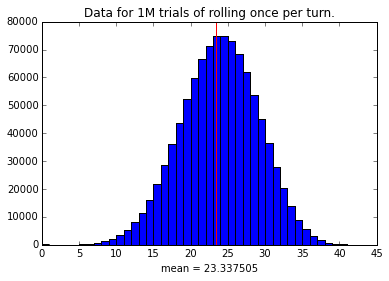

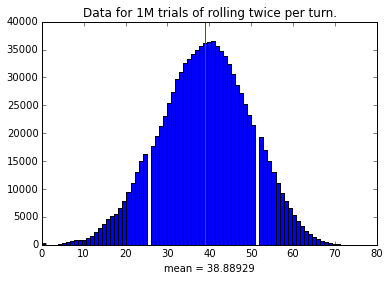

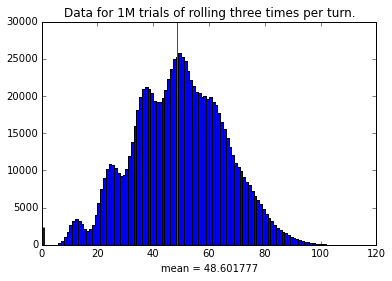

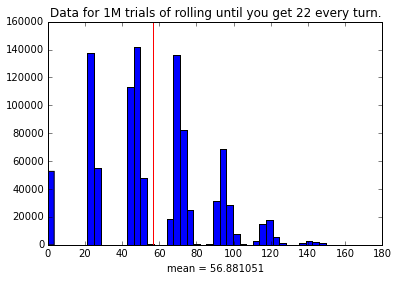

In [301]:
plt.hist(data1, bins=42)
plt.vlines(statistics.mean(data1), ymin=0, ymax=80000,color='red')
plt.xlabel('Final Score    mean = {}'.format(statistics.mean(data1)))
plt.title('Data for 1M trials of rolling once per turn.')
plt.show()
plt.hist(data2, bins=80)
plt.xlabel('Final Score    mean = {}'.format(statistics.mean(data2)))
plt.vlines(statistics.mean(data2), ymin=0, ymax=40000,color='red')
plt.title('Data for 1M trials of rolling twice per turn.')
plt.show()
plt.hist(data3, bins=108)
plt.xlabel('mean = {}'.format(statistics.mean(data3)))
plt.vlines(statistics.mean(data3), ymin=0, ymax=30000,color='red')
plt.title('Data for 1M trials of rolling three times per turn.')
plt.show()
plt.hist(data4, bins=50)
plt.xlabel('mean = {}'.format(statistics.mean(data4)))
plt.title('Data for 1M trials of rolling until you get 22 every turn.')
plt.vlines(statistics.mean(data4), ymin=0, ymax=160000,color='red')
plt.show()

# Style Comparisons

* The above data shows the average final score for 7 turns with 4 different styles of play.
    1. Rolling once per turn, no matter what.
    1. Rolling twice per turn, no matter what.
    1. Rolling three times per turn, no matter what.
    1. Rolling until you get to a score of 22.

* It is important to note that the x axis changes scale as you go down so the final trial is actually the most effective stategy of those listed.

* I below you can see how I came up with 22 for a number to roll until.

In [250]:
solve_data = [statistics.mean(get_data(Pushxplayer(n),100000)) for n in range(8,30)]

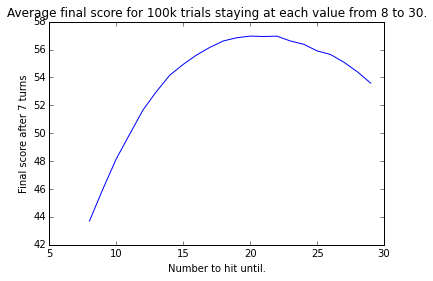

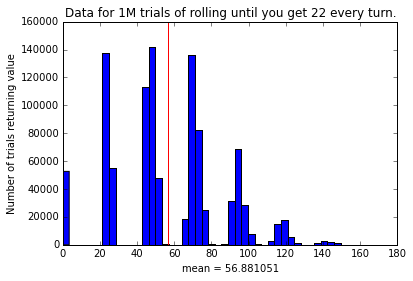

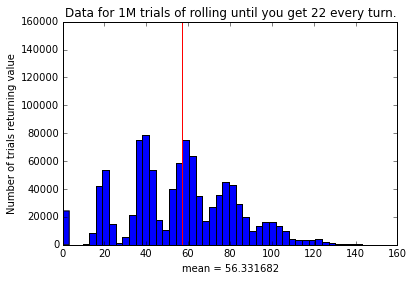

In [317]:
plt.plot(range(8,30), solve_data)
plt.title('Average final score for 100k trials staying at each value from 8 to 30.')
plt.ylabel('Final score after 7 turns')
plt.xlabel('Number to hit until.')
plt.show()

plt.hist(data4, bins=50)
plt.xlabel('mean = {}'.format(statistics.mean(data4)))
plt.ylabel('Number of trials returning value')
plt.title('Data for 1M trials of rolling until you get 22 every turn.')
plt.vlines(statistics.mean(data4), ymin=0, ymax=160000,color='red')
plt.show()

plt.hist(data5, bins=50)
plt.xlabel('mean = {}'.format(statistics.mean(data5)))
plt.ylabel('Number of trials returning value')
plt.title('Data for 1M trials of rolling until you get 22 every turn.')
plt.vlines(statistics.mean(data4), ymin=0, ymax=160000,color='red')
plt.show()

# Solving Solataire

* The above three graphs show how I cam up with the most efficient number to hit until and then the results of that style of play.
    1. This style of play is extremely difficult for humans as you bust fairly often.
    1. The differences between 20, 21, and 22 are all fairly minimal with 20 being the strongest in my data set.
    1. I added an attempt where the computer stopped if it got either 5 rolls in or hit 20 but the data didn't improve and I ran an attempt to massage it to be better but couldn't see a simple improvment from just always going until 20.

In [314]:
solve_mix_data = [statistics.mean(get_data(Push_5_xplayer(n),100000)) for n in range(18,22)]

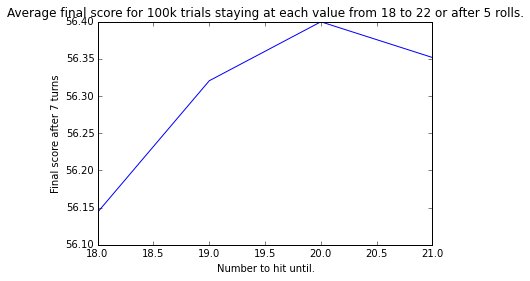

In [318]:
plt.plot(range(18,22), solve_mix_data)
plt.title('Average final score for 100k trials staying at each value from 18 to 22 or after 5 rolls.')
plt.ylabel('Final score after 7 turns')
plt.xlabel('Number to hit until.')
plt.show()
